## Installation Commands (Required Libraries):

In [1]:
pip install fireducks pandas matplotlib numpy duckdb

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.4/7.4 MB 18.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.1/42.1 MB 9.7 MB/s eta 0:00:00
  Attempting uninstall: pyarrow
    Found existing installation: pyarrow 18.1.0
    Uninstalling pyarrow-18.1.0:
      Successfully uninstalled pyarrow-18.1.0


##Enable Benchmark Mode (FireDucks Special):

In [2]:
FIREDUCKS_FLAGS = "--benchmark-mode"

##Code to Generate Large Dataset (10 Million Rows):

In [3]:
import pandas as pd
import numpy as np

# Create 10 Million rows
df = pd.DataFrame({
    'user_id': np.random.randint(1, 1_000_000, 10_000_000),
    'amount': np.random.rand(10_000_000) * 1000,  # up to 1000
    'category': np.random.choice(['food', 'tech', 'fashion', 'travel'], 10_000_000),
    'timestamp': pd.date_range(start='2021-01-01', periods=10_000_000, freq='s')
})

# Save to CSV
df.to_csv('large_dataset.csv', index=False)

print("Dataset with 10 Million Rows Generated Successfully!")


Dataset with 10 Million Rows Generated Successfully!


##Basic CSV Read & Filter:

In [4]:
import os
import time

## for Pandas
import pandas as pd
start_time = time.time()
pdf = pd.read_csv('large_dataset.csv')
print(pdf.head())
print("Pandas Read Time:", time.time() - start_time)

## for FireDucks
import fireducks.pandas as fd
start_time = time.time()
fdf = fd.read_csv('large_dataset.csv')
print(fdf.head())
print("FireDucks Read Time:", time.time() - start_time)


   user_id      amount category            timestamp
0   650684  896.354124   travel  2021-01-01 00:00:00
1   170195  578.267841     tech  2021-01-01 00:00:01
2   848050  131.724976   travel  2021-01-01 00:00:02
3   806245  889.258748  fashion  2021-01-01 00:00:03
4   974146  577.527555  fashion  2021-01-01 00:00:04
Pandas Read Time: 16.602593898773193
   user_id      amount category            timestamp
0   650684  896.354124   travel  2021-01-01 00:00:00
1   170195  578.267841     tech  2021-01-01 00:00:01
2   848050  131.724976   travel  2021-01-01 00:00:02
3   806245  889.258748  fashion  2021-01-01 00:00:03
4   974146  577.527555  fashion  2021-01-01 00:00:04
FireDucks Read Time: 4.951720714569092


##GroupBy Category (Average amount):

In [5]:
## for Pandas
start = time.time()
pdf_grouped = pdf.groupby('category')['amount'].mean().reset_index()
print(pdf_grouped)
print("Pandas GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_grouped = fdf.groupby('category')['amount'].mean().reset_index()
print(fdf_grouped)
print("FireDucks GroupBy Time:", time.time() - start)

  category      amount
0  fashion  500.112449
1     food  500.215409
2     tech  499.691079
3   travel  500.000038
Pandas GroupBy Time: 0.9376370906829834
  category      amount
0  fashion  500.112449
1     food  500.215409
2     tech  499.691079
3   travel  500.000038
FireDucks GroupBy Time: 0.29491138458251953



##Filter + GroupBy (amount > 500 → Avg amount per category):

In [6]:
## for Pandas
start = time.time()
pdf_result = pdf[pdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(pdf_result)
print("Pandas Filter + GroupBy Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_result = fdf[fdf['amount'] > 500].groupby('category')['amount'].mean().reset_index()
print(fdf_result)
print("FireDucks Filter + GroupBy Time:", time.time() - start)


  category      amount
0  fashion  749.843005
1     food  750.082441
2     tech  750.098330
3   travel  750.231377
Pandas Filter + GroupBy Time: 0.998321533203125
  category      amount
0  fashion  749.843005
1     food  750.082441
2     tech  750.098330
3   travel  750.231377
FireDucks Filter + GroupBy Time: 0.3027510643005371


##Sort by amount (Descending):

In [7]:

## for Pandas
start = time.time()
pdf_sorted = pdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("Pandas Sort Time:", time.time() - start)

## for FireDucks
start = time.time()
fdf_sorted = fdf.sort_values('amount', ascending=False).groupby('category').head(5)
print("FireDucks Sort Time:", time.time() - start)


Pandas Sort Time: 11.158467292785645
FireDucks Sort Time: 0.0006957054138183594


##Performance Comparison: Pandas vs FireDucks (Bar Chart):

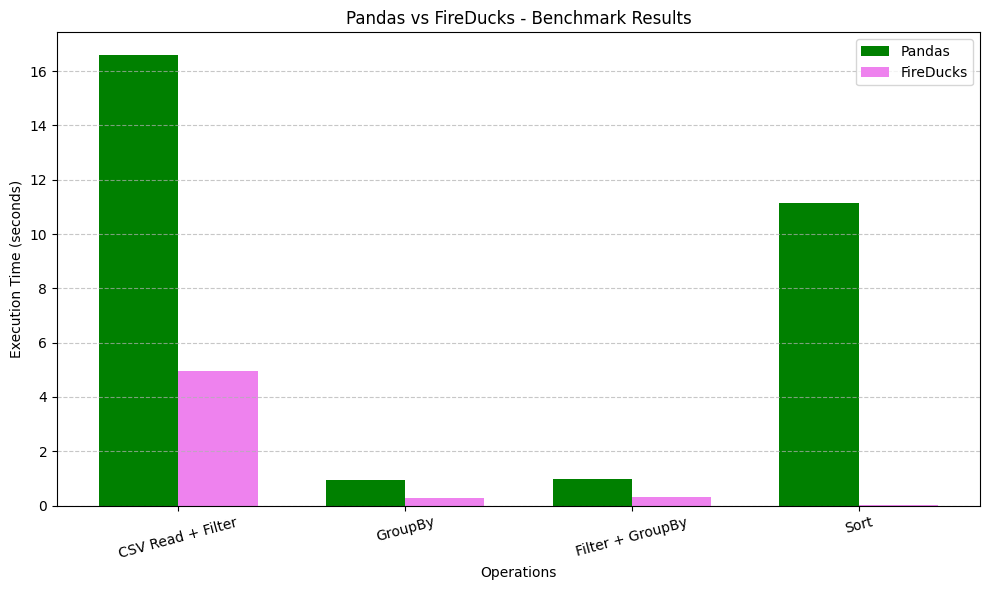

In [22]:
import matplotlib.pyplot as plt

# Operation Names
operations = ['CSV Read + Filter', 'GroupBy', 'Filter + GroupBy', 'Sort']

# Execution Times (in seconds)
pandas_times = [16.60, 0.93, 0.99, 11.15]      # Pandas Times
fireducks_times = [4.95, 0.29, 0.30, 0.01]     # FireDucks Times

x = range(len(operations))

plt.figure(figsize=(10, 6))
plt.bar(x, pandas_times, width=0.35, label='Pandas', color='green')
plt.bar([i + 0.35 for i in x], fireducks_times, width=0.35, label='FireDucks', color='violet')

plt.xlabel('Operations')
plt.ylabel('Execution Time (seconds)')
plt.title('Pandas vs FireDucks - Benchmark Results')
plt.xticks([i + 0.175 for i in x], operations, rotation=15)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()